<a href="https://colab.research.google.com/github/gustavoroque97/Teste-t-em-base-de-pinguins/blob/main/Testet-penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
pg = sns.load_dataset('penguins')

In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

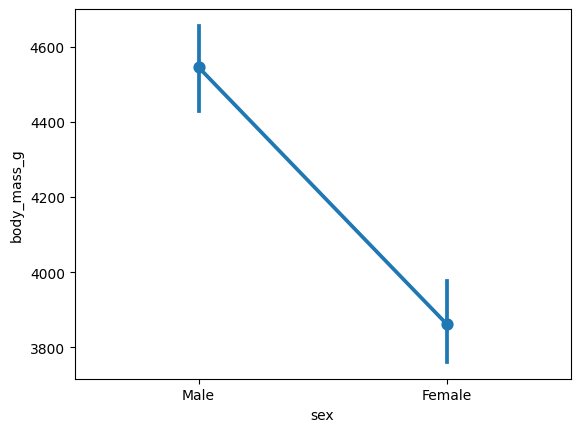

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [39]:
desvpad = pg.groupby('sex')['body_mass_g'].var().mean()**0.5
media_macho = pg.groupby('sex')['body_mass_g'].mean()['Male']
media_femea = pg.groupby('sex')['body_mass_g'].mean()['Female']

dif = media_macho - media_femea
erro_padrao = desvpad*((2/pg.shape[0])**0.5)
t = dif/erro_padrao
RC = st.t.ppf(0.95,pg.shape[0]-1)
p_value = 1-st.t.cdf(t,pg.shape[0]-1)

print(f'diferença: {dif:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')

diferença: 683.41
desvio padrão: 729.43
erro padrão: 55.62
estatística do teste: 12.29
região crítica: 1.65 ou mais
p-value: 0.00000 ou mais


Por esse p-value, podemos descartar a hipótese nula, ou seja, que pinguins machos e femeas possuem a mesma massa corporal em média, logo a diferença é significativa.

## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

A probabilidade para valores entre 1,65 e inf é de 5,82%


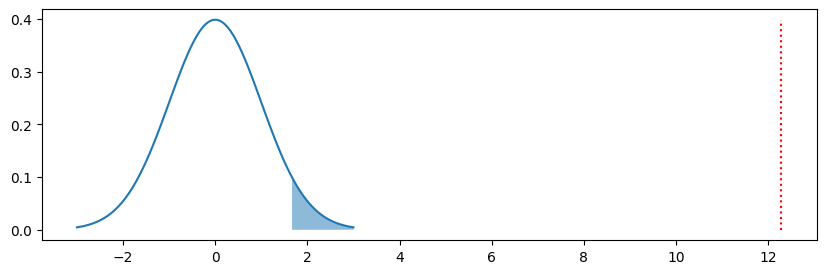

In [40]:
fig, ax = plt.subplots(figsize=(10,3))

# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance**.5

# Valores de X e Y para plotar a densidade
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = st.t.pdf(x, pg.shape[0]-1)

# low = início da região crítica do teste
low = st.t.ppf(.95, pg.shape[0]-1)
high = np.inf

# Gráfico da densidade
ax.plot(x, y)
# Esta linha de referência marca o valor observado da estatística do teste
ax.vlines(x=[t],
             ymin=0, ymax=y.max(),
             colors='r', linestyles='dotted')

# área
plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5)

# Probabilidade de X pertencer à área
prob_area = st.t.cdf(high, 18) - st.t.cdf(low, 18)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [43]:
pg.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [46]:
pg_adelie = pg[pg['species']=='Adelie']
pg_chinstrap = pg[pg['species']=='Chinstrap']
pg_gentoo = pg[pg['species']=='Gentoo']

In [48]:
desvpad = pg_adelie.groupby('sex')['body_mass_g'].var().mean()**0.5
media_macho = pg_adelie.groupby('sex')['body_mass_g'].mean()['Male']
media_femea = pg_adelie.groupby('sex')['body_mass_g'].mean()['Female']

dif = media_macho - media_femea
erro_padrao = desvpad*((2/pg_adelie.shape[0])**0.5)
t = dif/erro_padrao
RC = st.t.ppf(0.95,pg_adelie.shape[0]-1)
p_value = 1-st.t.cdf(t,pg_adelie.shape[0]-1)

print(f'diferença: {dif:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')

diferença: 674.66
desvio padrão: 310.52
erro padrão: 35.62
estatística do teste: 18.94
região crítica: 1.66 ou mais
p-value: 0.00000 ou mais


In [51]:
desvpad = pg_chinstrap.groupby('sex')['body_mass_g'].var().mean()**0.5
media_macho = pg_chinstrap.groupby('sex')['body_mass_g'].mean()['Male']
media_femea = pg_chinstrap.groupby('sex')['body_mass_g'].mean()['Female']

dif = media_macho - media_femea
erro_padrao = desvpad*((2/pg_chinstrap.shape[0])**0.5)
t = dif/erro_padrao
RC = st.t.ppf(0.95,pg_chinstrap.shape[0]-1)
p_value = 1-st.t.cdf(t,pg_chinstrap.shape[0]-1)

print(f'diferença: {dif:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')

diferença: 411.76
desvio padrão: 326.01
erro padrão: 55.91
estatística do teste: 7.36
região crítica: 1.67 ou mais
p-value: 0.00000 ou mais


In [53]:
desvpad = pg_gentoo.groupby('sex')['body_mass_g'].var().mean()**0.5
media_macho = pg_gentoo.groupby('sex')['body_mass_g'].mean()['Male']
media_femea = pg_gentoo.groupby('sex')['body_mass_g'].mean()['Female']

dif = media_macho - media_femea
erro_padrao = desvpad*((2/pg_gentoo.shape[0])**0.5)
t = dif/erro_padrao
RC = st.t.ppf(0.95,pg_gentoo.shape[0]-1)
p_value = 1-st.t.cdf(t,pg_gentoo.shape[0]-1)

print(f'diferença: {dif:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')

diferença: 805.09
desvio padrão: 297.79
erro padrão: 37.82
estatística do teste: 21.29
região crítica: 1.66 ou mais
p-value: 0.00000 ou mais


As diferenças de peso são significativas para todas as três espécies.

<Axes: xlabel='species', ylabel='body_mass_g'>

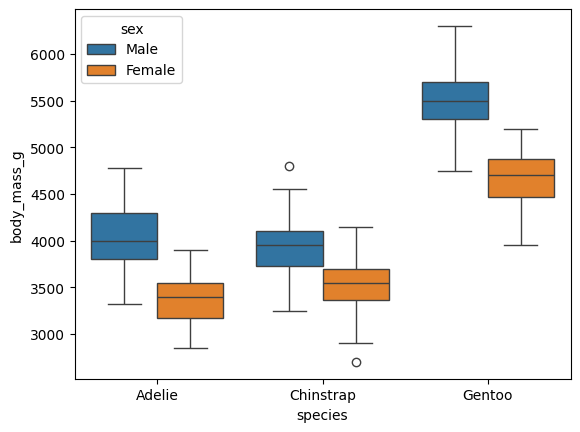

In [56]:
sns.boxplot(data=pg,x='species',y='body_mass_g', hue='sex')